### 데이터의 이해

In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
data = pd.read_csv('train.csv', encoding='CP949')
data.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [5]:
dataP = data.copy()

In [6]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


### 데이터의 시각화

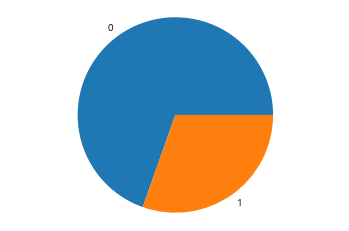

In [7]:
y_label = dataP['gender'].value_counts(ascending=False, normalize=True).index
y_vals = dataP['gender'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

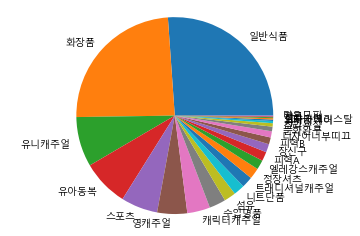

In [8]:
job_label = dataP['주구매코너'].value_counts(ascending=False, normalize=True).index
job_vals = dataP['주구매코너'].value_counts(ascending=False, normalize=True).values

plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

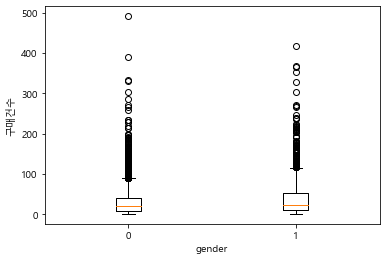

In [9]:
y_female = dataP[dataP['gender'] == 0]
y_male = dataP[dataP['gender'] == 1]

y_buy = [y_female['구매건수'], y_male['구매건수']]


plt.boxplot(y_buy)

plt.xlabel('gender')
plt.ylabel('구매건수')
ax = plt.gca()

plt.setp(ax, xticklabels = [0,1])
plt.show()

### 문자열을 수치로 변환

In [10]:
obj=['주구매코너'] 

In [11]:
dataP[obj].head()

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A


In [12]:
dataP[obj] = dataP[obj].apply(lambda x: x.astype('category').cat.codes) 
# cat.code : 문자가 범주형으로 바뀌면 생기는 코드
# apply : 각각의 값별로 함수를 적용

In [13]:
dataP[obj].head()

,주구매코너
0,24
1,11
2,15
3,24
4,22


In [14]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [15]:
dataP.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [16]:
dataP.shape

(5000, 18)

### 결측값 대체

In [17]:
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]

In [18]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(dataP[con])

SimpleImputer(strategy='most_frequent')

In [19]:
x = imputer_con.transform(dataP[con])
x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [20]:
dataP[con] = x
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [21]:
dataP.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

### 파생 변수 적용

In [22]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = dataP.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
dataP_ = pd.merge(dataP, df0, on='주구매코너')
# dataP_.head()
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
dataP_.head()

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,25740
1,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,25740
2,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24,25740
3,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24,25740
4,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24,25740


In [23]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(dataP_)
dataPP = dropFeatures(dataP_) 
dataPP[(dataPP['주구매코너']==2)].head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4123,363,0,90960,3.0,4,20.0,25.0,2,149,90960.000,90960.000,363840.000,454800.000,90960.000,90960.000,90960.000,1.250
4124,4822,0,248049,2.3,10,10.5,33.3,2,149,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
4125,11617,1,124767,3.8,8,25.0,62.5,2,149,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,124766.667,1.500
4126,12979,0,79250,1.7,10,0.0,33.3,2,149,554750.000,396250.000,79250.000,158500.000,79250.000,792500.000,79250.000,4.000
4127,16414,0,31625,1.0,6,12.5,14.3,2,149,63250.000,189750.000,31625.000,94875.000,158125.000,31625.000,31625.000,1.143


### 문자열값을 통합

In [24]:
dataPP['평균할부개월수'].value_counts()

1.0    501
2.0    396
1.7    330
1.8    318
1.9    317
      ... 
8.2      1
5.1      1
5.7      1
5.2      1
5.3      1
Name: 평균할부개월수, Length: 61, dtype: int64

In [25]:
# 평균할부개월수를 1개월,2개월,3개월,4개월이상으로 구분
dataPP.loc[dataPP['평균할부개월수'] <= 1, '평균할부개월수2'] = '1개월'
dataPP.loc[(dataPP['평균할부개월수'] > 1) & (dataPP['평균할부개월수'] <= 2), '평균할부개월수2'] = '2개월'
dataPP.loc[(dataPP['평균할부개월수'] > 2) & (dataPP['평균할부개월수'] <= 3), '평균할부개월수2'] = '3개월'
dataPP.loc[dataPP['평균할부개월수'] > 3, '평균할부개월수2'] = '4개월'
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,408060.000,272040.000,272040.000,45340.000,45340.000,408060.000,1.500,2개월
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,701428.571,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000,2개월
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,752200.000,150440.000,752200.000,150440.000,150440.000,150440.000,1.667,3개월
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,352430.769,704861.538,176215.385,881076.923,88107.692,88107.692,1.444,2개월
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,359255.000,82905.000,303985.000,27635.000,27635.000,138175.000,2.667,1개월


In [26]:
dataPP['평균할부개월수2'].isnull().sum()

0

In [27]:
# 주말방문비율 주말방문25%, 주말방문50%, 주말방문75%, 주말방문100% 로 구분
dataPP.loc[dataPP['주말방문비율'] <= 25, '주말방문비율2'] = '주말방문25%'
dataPP.loc[(dataPP['주말방문비율'] > 25) & (dataPP['주말방문비율'] <= 50), '주말방문비율2'] = '주말방문50%'
dataPP.loc[(dataPP['주말방문비율'] > 50) & (dataPP['주말방문비율'] <= 75), '주말방문비율2'] = '주말방문75%'
dataPP.loc[dataPP['주말방문비율'] > 75, '주말방문비율2'] = '주말방문100%'
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2,주말방문비율2
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,408060.000,272040.000,272040.000,45340.000,45340.000,408060.000,1.500,2개월,주말방문100%
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,701428.571,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000,2개월,주말방문50%
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,752200.000,150440.000,752200.000,150440.000,150440.000,150440.000,1.667,3개월,주말방문100%
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,352430.769,704861.538,176215.385,881076.923,88107.692,88107.692,1.444,2개월,주말방문25%
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,359255.000,82905.000,303985.000,27635.000,27635.000,138175.000,2.667,1개월,주말방문50%


In [28]:
dataPP['주말방문비율2'].isnull().sum()

0

In [29]:
# 더미변수로 변환
dataPP_1 = pd.get_dummies(dataPP['평균할부개월수2'])
dataPP_2 = pd.get_dummies(dataPP['주말방문비율2'])
dataPP_2.head()

,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [30]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = dataPP[['custid','gender','평균구매가격', '평균할부개월수', '구매브랜드종류','수입상품_구매비율', '주말방문비율','주구매코너','코너별구매건','아침구매액','점심구매액','저녁구매액','봄구매액','여름구매액','가을구매액','겨울구매액','내점구매율']]
tmp1.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,408060.000,272040.000,272040.000,45340.000,45340.000,408060.000,1.500
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,701428.571,1262571.429,1052142.857,70142.857,350714.286,561142.857,2.000
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,752200.000,150440.000,752200.000,150440.000,150440.000,150440.000,1.667
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,352430.769,704861.538,176215.385,881076.923,88107.692,88107.692,1.444
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,359255.000,82905.000,303985.000,27635.000,27635.000,138175.000,2.667


In [31]:
tmp2 = pd.concat([tmp1, dataPP_1], axis=1)
dataPP = pd.concat([tmp2, dataPP_2], axis=1)
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,...,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,...,408060.000,1.500,0,1,0,0,1,0,0,0
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,...,561142.857,2.000,0,1,0,0,0,0,1,0
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,...,150440.000,1.667,0,0,1,0,1,0,0,0
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,...,88107.692,1.444,0,1,0,0,0,1,0,0
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,...,138175.000,2.667,1,0,0,0,0,0,1,0


C:\Users\lhh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lhh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

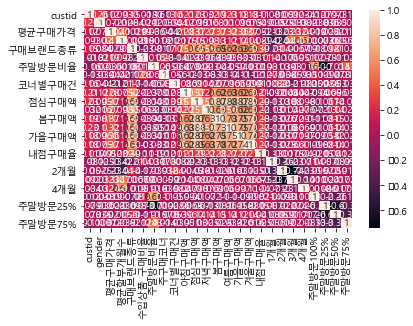

In [32]:
sns.heatmap(dataPP.corr(), annot=True)

In [33]:
# 전처리한 결과를 CSV파일로 보존
dataPP.to_csv('depart-prep.csv', encoding='utf-8-sig', index=False)

### 불균형데이터의 균형화(남녀 비율 조정)

In [34]:
dataPP = pd.read_csv('depart-prep.csv')
dataPP.head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,...,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,18,0,45340,1.7,9,26.7,100.0,24,25740,45340.000,...,408060.000,1.500,0,1,0,0,1,0,0,0
1,26,0,70143,1.4,15,39.3,28.6,24,25740,70142.857,...,561142.857,2.000,0,1,0,0,0,0,1,0
2,82,0,150440,2.6,5,60.0,100.0,24,25740,150440.000,...,150440.000,1.667,0,0,1,0,1,0,0,0
3,92,0,88108,1.9,7,23.1,22.2,24,25740,88107.692,...,88107.692,1.444,0,1,0,0,0,1,0,0
4,100,0,27635,1.0,10,25.0,33.3,24,25740,27635.000,...,138175.000,2.667,1,0,0,0,0,0,1,0


In [35]:
dataPP['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [36]:
# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

In [37]:
dataPT = dataPP.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

# 데이터 세트를 설명변수와 목적변수로 분할
Y = np.array(dataPD['gender'])
X = np.array(dataPD.drop(['custid','gender'], axis=1))

# y가 1과 0인 데이터의 건수를 카운트
np.sum(Y == 1), np.sum(Y == 0)


(1521, 3479)

In [38]:
# y가 1인 데이터의 건수에 맞춰서 오버 샘플링
sampler = RandomOverSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)

# y가 1과 0인 데이터 건수를 카운트
np.sum(Y == 1), np.sum(Y == 0)

(3479, 3479)

### xgboost

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [40]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [41]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [42]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [43]:
dtest.feature_names

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17']

In [44]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [45]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[15:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68863	eval-logloss:0.68954
[1]	train-logloss:0.68494	eval-logloss:0.68671
[2]	train-logloss:0.68176	eval-logloss:0.68441
[3]	train-logloss:0.67916	eval-logloss:0.68254
[4]	train-logloss:0.67636	eval-logloss:0.68064
[5]	train-logloss:0.67424	eval-logloss:0.67924
[6]	train-logloss:0.67210	eval-logloss:0.67808
[7]	train-logloss:0.67025	eval-logloss:0.67727
[8]	train-logloss:0.66833	eval-logloss:0.67650
[9]	train-logloss:0.66691	eval-logloss:0.67562
[10]	train-logloss:0.66548	eval-logloss:0.67533
[11]	train-logloss:0.66433	eval-logloss:0.67492
[12]	train-logloss:0.66314	eval-logloss:0

[162]	train-logloss:0.55254	eval-logloss:0.62391
[163]	train-logloss:0.55229	eval-logloss:0.62400
[164]	train-logloss:0.55192	eval-logloss:0.62401
[165]	train-logloss:0.55144	eval-logloss:0.62383
[166]	train-logloss:0.55079	eval-logloss:0.62366
[167]	train-logloss:0.54985	eval-logloss:0.62330
[168]	train-logloss:0.54928	eval-logloss:0.62290
[169]	train-logloss:0.54857	eval-logloss:0.62288
[170]	train-logloss:0.54817	eval-logloss:0.62272
[171]	train-logloss:0.54800	eval-logloss:0.62264
[172]	train-logloss:0.54752	eval-logloss:0.62241
[173]	train-logloss:0.54687	eval-logloss:0.62201
[174]	train-logloss:0.54639	eval-logloss:0.62169
[175]	train-logloss:0.54600	eval-logloss:0.62175
[176]	train-logloss:0.54539	eval-logloss:0.62154
[177]	train-logloss:0.54491	eval-logloss:0.62138
[178]	train-logloss:0.54472	eval-logloss:0.62146
[179]	train-logloss:0.54460	eval-logloss:0.62133
[180]	train-logloss:0.54434	eval-logloss:0.62143
[181]	train-logloss:0.54386	eval-logloss:0.62102
[182]	train-logloss:

[330]	train-logloss:0.47954	eval-logloss:0.59711
[331]	train-logloss:0.47922	eval-logloss:0.59689
[332]	train-logloss:0.47885	eval-logloss:0.59672
[333]	train-logloss:0.47878	eval-logloss:0.59680
[334]	train-logloss:0.47869	eval-logloss:0.59694
[335]	train-logloss:0.47807	eval-logloss:0.59656
[336]	train-logloss:0.47752	eval-logloss:0.59639
[337]	train-logloss:0.47727	eval-logloss:0.59636
[338]	train-logloss:0.47689	eval-logloss:0.59620
[339]	train-logloss:0.47645	eval-logloss:0.59602
[340]	train-logloss:0.47617	eval-logloss:0.59599
[341]	train-logloss:0.47607	eval-logloss:0.59594
[342]	train-logloss:0.47595	eval-logloss:0.59593
[343]	train-logloss:0.47530	eval-logloss:0.59561
[344]	train-logloss:0.47474	eval-logloss:0.59540
[345]	train-logloss:0.47427	eval-logloss:0.59515
[346]	train-logloss:0.47376	eval-logloss:0.59500
[347]	train-logloss:0.47336	eval-logloss:0.59485
[348]	train-logloss:0.47308	eval-logloss:0.59470
[349]	train-logloss:0.47270	eval-logloss:0.59440
[350]	train-logloss:

In [46]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.842 0.516 0.54  0.36  0.784 0.371 0.618 0.78  0.229 0.551]


In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [48]:
get_clf_eval(y_test, preds)

오차행렬
[[571 313]
 [214 642]]
정확도: 0.6971, 정밀도: 0.6723, 재현율: 0.7500


### roc curve

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [50]:
# 모델이 예측한 확률이 필요
# 0, 1 중 1의 값만 뽑아라
fpr, tpr, _ = roc_curve(y_test, preds)
auc(fpr, tpr)

0.6979638009049772

In [51]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

In [52]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

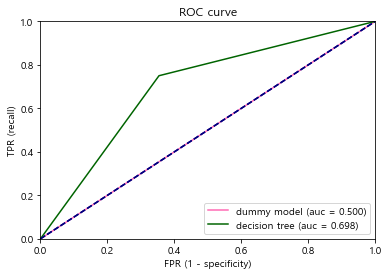

In [54]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(y_test, preds)
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')

### test 데이터파일 적용

In [55]:
new = pd.read_csv('test.csv', encoding='CP949')
new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [56]:
ndf = new.copy()

In [57]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(ndf[con])

SimpleImputer(strategy='most_frequent')

In [58]:
x = imputer_con.transform(ndf[con])
x

array([[ 5.,  4.,  7., ..., 13.,  1., 11.],
       [13.,  8., 10., ...,  4., 10., 25.],
       [ 6.,  7.,  3., ...,  3.,  1., 18.],
       ...,
       [ 4.,  1.,  6., ...,  1.,  1., 12.],
       [ 1.,  7.,  4., ...,  2.,  4.,  8.],
       [23., 20.,  9., ..., 11.,  4., 61.]])

In [59]:
ndf[con] = x
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [60]:
ndf[obj] = ndf[obj].apply(lambda x: x.astype('category').cat.codes) 

In [61]:
ndf.head(3)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13


In [62]:
ndf.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [63]:
ndt0 = ndf.groupby(['주구매코너'])['구매건수'].agg(sum)   
ndf0 = ndt0.to_frame().reset_index()
ndf0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
ndf_ = pd.merge(ndf, ndf0, on='주구매코너')
ndf_.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,1315
1,100092,2973500,38,78250,4.2,20,16,7.9,43.8,10.0,10.0,13.0,5.0,9.0,3.0,26.0,15,1315
2,100130,3633456,41,88621,3.2,27,16,2.4,43.8,7.0,17.0,4.0,13.0,1.0,27.0,13.0,15,1315
3,100170,1536790,8,192099,2.5,8,5,12.5,0.0,2.0,3.0,2.0,1.0,1.0,1.0,8.0,15,1315
4,100274,1101000,8,137625,5.9,5,5,25.0,0.0,1.0,3.0,5.0,1.0,3.0,1.0,5.0,15,1315


In [64]:
def createFeatures(ndf_p):
    ndf_p['아침구매액'] = np.round(ndf_p['총구매액']*(ndf_p['아침_구매건수'] /ndf_p['구매건수'] ), 3)
    ndf_p['점심구매액'] = np.round(ndf_p['총구매액']*(ndf_p['점심_구매건수'] /ndf_p['구매건수'] ), 3)
    ndf_p['저녁구매액'] = np.round(ndf_p['총구매액']*(ndf_p['저녁_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['봄구매액']   = np.round(ndf_p['총구매액']*(ndf_p['봄_구매건수'] /ndf_p['구매건수'] ), 3) 
    ndf_p['여름구매액'] = np.round(ndf_p['총구매액']*(ndf_p['여름_구매건수'] /ndf_p['구매건수'] ), 3) 
    ndf_p['가을구매액'] = np.round(ndf_p['총구매액']*(ndf_p['가을_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['겨울구매액'] = np.round(ndf_p['총구매액']*(ndf_p['겨울_구매건수'] /ndf_p['구매건수'] ), 3)  
    ndf_p['내점구매율'] = np.round(ndf_p['구매건수'] /ndf_p['내점일수'], 3)

def dropFeatures(ndf_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return ndf_p.drop(drop_cols, axis=1)

createFeatures(ndf_)
ndf0 = dropFeatures(ndf_) 
ndf0[(ndf0['주구매코너']==2)].head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
1122,100008,62068,1.2,8,11.1,33.3,2,158,62067.778,310338.889,248271.111,62067.778,62067.778,248271.111,248271.111,1.000
1123,100281,183600,4.4,5,20.0,25.0,2,158,183600.000,918000.000,183600.000,183600.000,183600.000,183600.000,550800.000,1.250
1124,100371,85037,1.9,39,7.8,69.0,2,158,85036.863,2551105.882,1785774.118,425184.314,1530663.529,935405.490,1445626.667,1.759
1125,100386,155873,3.1,18,9.1,33.3,2,158,779363.636,2182218.182,467618.182,1402854.545,467618.182,1402854.545,155872.727,1.467
1126,100390,200447,1.2,13,5.9,12.5,2,158,200447.059,2004470.588,1403129.412,200447.059,2605811.765,601341.176,200447.059,2.125


In [65]:
# 평균할부개월수를 1개월,2개월,3개월,4개월이상으로 구분
ndf0.loc[ndf0['평균할부개월수'] <= 1, '평균할부개월수2'] = '1개월'
ndf0.loc[(ndf0['평균할부개월수'] > 1) & (ndf0['평균할부개월수'] <= 2), '평균할부개월수2'] = '2개월'
ndf0.loc[(ndf0['평균할부개월수'] > 2) & (ndf0['평균할부개월수'] <= 3), '평균할부개월수2'] = '3개월'
ndf0.loc[ndf0['평균할부개월수'] > 3, '평균할부개월수2'] = '4개월'
ndf0.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562,3개월
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375,4개월
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562,4개월
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600,3개월
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600,4개월


In [66]:
ndf0['평균할부개월수2'].isnull().sum()

0

In [67]:
# 주말방문비율 주말방문25%, 주말방문50%, 주말방문75%, 주말방문100% 로 구분
ndf0.loc[ndf0['주말방문비율'] <= 25, '주말방문비율2'] = '주말방문25%'
ndf0.loc[(ndf0['주말방문비율'] > 25) & (ndf0['주말방문비율'] <= 50), '주말방문비율2'] = '주말방문50%'
ndf0.loc[(ndf0['주말방문비율'] > 50) & (ndf0['주말방문비율'] <= 75), '주말방문비율2'] = '주말방문75%'
ndf0.loc[ndf0['주말방문비율'] > 75, '주말방문비율2'] = '주말방문100%'
ndf0.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,평균할부개월수2,주말방문비율2
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562,3개월,주말방문50%
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375,4개월,주말방문50%
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562,4개월,주말방문50%
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600,3개월,주말방문25%
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600,4개월,주말방문25%


In [68]:
ndf0['주말방문비율2'].isnull().sum()

0

In [69]:
# 더미변수로 변환
ndf0_1 = pd.get_dummies(ndf0['평균할부개월수2'])
ndf0_2 = pd.get_dummies(ndf0['주말방문비율2'])
ndf0_2.head()

,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [70]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = ndf0[['custid','평균구매가격', '평균할부개월수', '구매브랜드종류','수입상품_구매비율', '주말방문비율','주구매코너','코너별구매건','아침구매액','점심구매액','저녁구매액','봄구매액','여름구매액','가을구매액','겨울구매액','내점구매율']]
tmp1.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,137560.000,962920.000,1238040.000,687800.000,550240.000,1.562
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,234750.000,1017250.000,391250.000,782500.000,782500.000,2.375
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,2392763.707,354483.512,1152071.415,620346.146,1506554.927,2.562
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,192098.750,384197.500,192098.750,384197.500,576296.250,1.600
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,137625.000,688125.000,137625.000,137625.000,412875.000,1.600


In [71]:
tmp2 = pd.concat([tmp1, ndf0_1], axis=1)
ndf0 = pd.concat([tmp2, ndf0_2], axis=1)
ndf0.head()

,custid,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,...,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,100001,137560,2.2,19,12.0,31.2,15,1315,1788280.000,1513160.000,...,550240.000,1.562,0,0,1,0,0,0,1,0
1,100092,78250,4.2,20,7.9,43.8,15,1315,704250.000,2034500.000,...,782500.000,2.375,0,0,0,1,0,0,1,0
2,100130,88621,3.2,27,2.4,43.8,15,1315,88620.878,1152071.415,...,1506554.927,2.562,0,0,0,1,0,0,1,0
3,100170,192099,2.5,8,12.5,0.0,15,1315,192098.750,1536790.000,...,576296.250,1.600,0,0,1,0,0,1,0,0
4,100274,137625,5.9,5,25.0,0.0,15,1315,412875.000,688125.000,...,412875.000,1.600,0,0,0,1,0,1,0,0


In [72]:
ndf1 = ndf0.copy()
ndf2 = ndf1.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
ndf2.head()

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%
0,100001,137560,19,1315,1788280.000,1513160.000,962920.000,1238040.000,687800.000,550240.000,1.562,0,0,1,0,0,0,1,0
1,100092,78250,20,1315,704250.000,2034500.000,1017250.000,391250.000,782500.000,782500.000,2.375,0,0,0,1,0,0,1,0
2,100130,88621,27,1315,88620.878,1152071.415,354483.512,1152071.415,620346.146,1506554.927,2.562,0,0,0,1,0,0,1,0
3,100170,192099,8,1315,192098.750,1536790.000,384197.500,192098.750,384197.500,576296.250,1.600,0,0,1,0,0,1,0,0
4,100274,137625,5,1315,412875.000,688125.000,688125.000,137625.000,137625.000,412875.000,1.600,0,0,0,1,0,1,0,0


In [74]:
dtest_ndf = xgb.DMatrix(data=ndf2.iloc[:, 1:], feature_names=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9','f10','f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17'])

In [75]:
display(dtest.feature_names , dtest_ndf.feature_names )

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17']

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17']

In [76]:
ndf2['pred'] = np.round(xgb_model.predict(dtest_ndf))
ndf2.head()

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%,pred
0,100001,137560,19,1315,1788280.000,1513160.000,962920.000,1238040.000,687800.000,550240.000,1.562,0,0,1,0,0,0,1,0,1.0
1,100092,78250,20,1315,704250.000,2034500.000,1017250.000,391250.000,782500.000,782500.000,2.375,0,0,0,1,0,0,1,0,1.0
2,100130,88621,27,1315,88620.878,1152071.415,354483.512,1152071.415,620346.146,1506554.927,2.562,0,0,0,1,0,0,1,0,0.0
3,100170,192099,8,1315,192098.750,1536790.000,384197.500,192098.750,384197.500,576296.250,1.600,0,0,1,0,0,1,0,0,1.0
4,100274,137625,5,1315,412875.000,688125.000,688125.000,137625.000,137625.000,412875.000,1.600,0,0,0,1,0,1,0,0,0.0


In [79]:
target = ndf2.query('pred == 0')  
target.sort_values('pred', ascending=False).to_csv("gender_H백화점.csv", encoding='utf-8-sig', index=False)
pd.read_csv("gender_H백화점.csv")

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율,1개월,2개월,3개월,4개월,주말방문100%,주말방문25%,주말방문50%,주말방문75%,pred
0,100130,88621,27,1315,88620.878,1152071.415,354483.512,1152071.415,620346.146,1506554.927,2.562,0,0,0,1,0,0,1,0,0.0
1,104294,130664,20,26123,391993.455,2221296.242,1175980.364,1567973.818,783986.909,783986.909,2.357,0,1,0,0,0,1,0,0,0.0
2,104254,69106,15,26123,207318.750,1243912.500,138212.500,552850.000,345531.250,1313018.750,1.684,0,1,0,0,0,0,1,0,0.0
3,104265,30000,1,26123,30000.000,90000.000,60000.000,30000.000,30000.000,30000.000,1.000,1,0,0,0,0,1,0,0,0.0
4,104273,45832,15,26123,91664.828,779151.034,91664.828,274994.483,366659.310,687486.207,1.933,0,1,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,103421,17694,13,74942,17694.106,300799.809,336188.021,230023.383,212329.277,53082.319,1.516,1,0,0,0,0,1,0,0,0.0
3052,103434,68373,27,74942,410240.455,2119575.682,546987.273,1230721.364,820480.909,410240.455,1.913,0,1,0,0,1,0,0,0,0.0
3053,103439,57244,13,74942,57244.500,629689.500,228978.000,286222.500,457956.000,286222.500,1.571,0,1,0,0,0,0,1,0,0.0
3054,103443,45478,3,74942,45477.556,181910.222,136432.667,227387.778,45477.556,45477.556,1.000,0,1,0,0,0,0,1,0,0.0
